In [17]:
from scipy.stats import norm
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm

In [2]:
data = norm.rvs(loc=100,scale=20,size=1000,random_state=1)

In [3]:
def likelihood(params,data):
    return norm.logpdf(data,loc=params[0],scale=params[1]).sum()

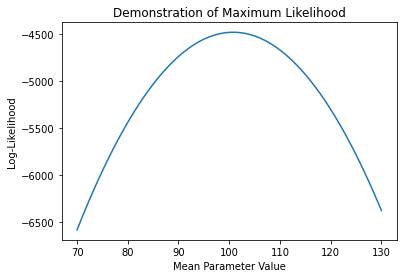

In [4]:
x = np.linspace(70,130,1000)
y = [likelihood([val,15],data) for val in x]

plt.plot(x,y)
plt.title('Demonstration of Maximum Likelihood')
plt.ylabel('Log-Likelihood')
plt.xlabel('Mean Parameter Value')
plt.show()

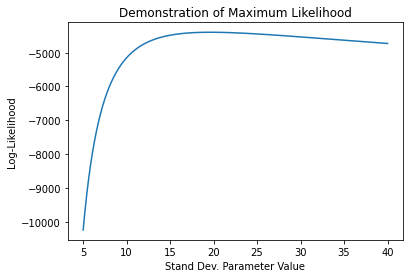

In [44]:
x = np.linspace(5,40,1000)
y = [likelihood([100,val],data) for val in x]

plt.plot(x,y)
plt.title('Demonstration of Maximum Likelihood')
plt.ylabel('Log-Likelihood')
plt.xlabel('Stand Dev. Parameter Value')
plt.show()

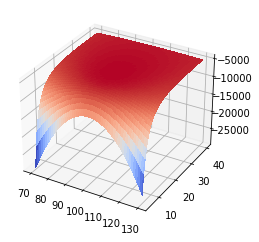

In [45]:
X = np.linspace(70, 130, 100)
Y = np.linspace(5, 40, 100)
xv, yv = np.meshgrid(X, Y)
Z = np.array([likelihood([x,y],data) for x,y in zip(xv.flatten(),yv.flatten())]).reshape(xv.shape)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})


surf = ax.plot_surface(xv, yv, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

In [51]:
def neglikelihood(params,data):
    return -1*likelihood(params,data)
result = minimize(neglikelihood,[50,10],args=(data))
result.x/np.diagonal(result.hess_inv)

array([164.77270316, 126.28335348])